<a href="https://colab.research.google.com/github/ekansh1811/cnn/blob/main/main_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
batch_size = 256
num_classes = 10
learning_rate = 0.01
num_epochs = 20

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
all_transform = transforms.Compose([transforms.Resize((32,32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.4914,0.4822,0.4465],
                                                         std=[0.2023,0.1994,0.2010])
                                    ])

In [5]:
train_dataset = datasets.CIFAR10(root='./data',
                                 train = True,
                                 transform = all_transform,
                                 download = True)

test_dataset = datasets.CIFAR10(root = './data',
                                train = False,
                                transform = all_transform,
                                download = True)

100%|██████████| 170498071/170498071 [00:05<00:00, 32001326.25it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
train_loader = DataLoader(dataset = train_dataset,
                          batch_size = batch_size,
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset,
                         batch_size = batch_size,
                         shuffle = True)

In [7]:
class ConvNeuralNet(nn.Module):
  def __init__(self, num_classes):
    super(ConvNeuralNet, self).__init__()
    self.conv_l1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
    self.conv_l2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
    self.max_pool1 = nn.MaxPool2d(kernel_size=2,stride=2)

    self.conv_l3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
    self.conv_l4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(1600,128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128,num_classes)

  def forward(self, x):
    out = self.conv_l1(x)
    out = self.conv_l2(out)
    out = self.max_pool1(out)

    out = self.conv_l3(out)
    out = self.conv_l4(out)
    out = self.max_pool2(out)

    out = out.reshape(out.size(0), -1)

    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out

In [8]:
model = ConvNeuralNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.005, momentum = 0.9)
total_step = len(train_loader)

Epoch [1], loss:1.5025
accuracy =  44.800000000000004



Epoch [2], loss:1.1683
accuracy =  54.84



Epoch [3], loss:1.0980
accuracy =  59.21999999999999



Epoch [4], loss:0.8016
accuracy =  62.71



Epoch [5], loss:0.8844
accuracy =  64.85



Epoch [6], loss:1.0710
accuracy =  66.66



Epoch [7], loss:0.6654
accuracy =  67.75



Epoch [8], loss:0.8467
accuracy =  68.84



Epoch [9], loss:0.7029
accuracy =  69.42



Epoch [10], loss:1.0025
accuracy =  69.5



Epoch [11], loss:0.5716
accuracy =  69.82000000000001



Epoch [12], loss:0.7662
accuracy =  70.37



Epoch [13], loss:0.6498
accuracy =  70.62



Epoch [14], loss:0.6862
accuracy =  70.38



Epoch [15], loss:0.4261
accuracy =  69.71000000000001





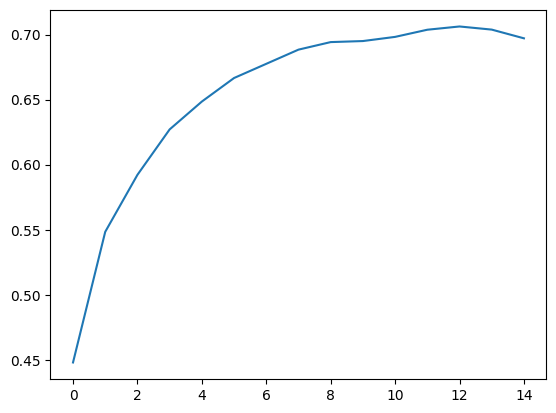

In [9]:
acc=[0,0]
k = 0
j = 0
while True:
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i/195==1:
      j+=1
      with torch.no_grad():
        correct = 0
        samples = 0
        for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _,predicted = torch.max(outputs.data,1)
          samples+=labels.size(0)
          correct+= (predicted == labels).sum().item()
      print('Epoch [{}], loss:{:.4f}'.format(j,loss.item()))
      print('accuracy = ',100*(correct/samples))
      print('\n\n')
      accuracy = correct/samples
      acc+=[accuracy]
      if acc[len(acc)-1]<acc[len(acc)-2] and acc[len(acc)-2]<acc[len(acc)-3]:
        k+=1
        break
  if k==1:
    break

plt.plot(acc[2:])


In [11]:
with torch.no_grad():
  correct = 0
  samples = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    samples+=labels.size(0)
    correct+= (predicted == labels).sum().item()
print('accuracy = ',100*(correct/samples))

accuracy =  69.71000000000001
